<a href="https://colab.research.google.com/github/Shash100int/minor_project/blob/main/cotton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 489.6 MB 18 kB/s 
     |████████████████████████████████| 1.3 MB 47.8 MB/s 
     |████████████████████████████████| 463 kB 53.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 22.11.23
    Uninstalling flatbuffers-22.11.23:
      Successfully uninstalled flatbuffers-22.11.23
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2


In [21]:
pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
import numpy as np
from tensorflow.keras.preprocessing import image

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [24]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Disease/train',
                                                 target_size=  (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Disease/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [25]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax')) 

In [26]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [27]:
# Compiling the CNN
cnn.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
61/61 [==============================] - 42s 676ms/step - loss: 1.1634 - accuracy: 0.4695 - val_loss: 1.0826 - val_accuracy: 0.5189
Epoch 2/10
61/61 [==============================] - 36s 597ms/step - loss: 0.9610 - accuracy: 0.6146 - val_loss: 0.9874 - val_accuracy: 0.6132
Epoch 3/10
61/61 [==============================] - 36s 589ms/step - loss: 0.8116 - accuracy: 0.6863 - val_loss: 0.8874 - val_accuracy: 0.6792
Epoch 4/10
61/61 [==============================] - 37s 604ms/step - loss: 0.6497 - accuracy: 0.7468 - val_loss: 1.3770 - val_accuracy: 0.5472
Epoch 5/10
61/61 [==============================] - 36s 597ms/step - loss: 0.6637 - accuracy: 0.7514 - val_loss: 0.7611 - val_accuracy: 0.6887
Epoch 6/10
61/61 [==============================] - 39s 644ms/step - loss: 0.5575 - accuracy: 0.7888 - val_loss: 0.5477 - val_accuracy: 0.7642
Epoch 7/10
61/61 [==============================] - 36s 595ms/step - loss: 0.5430 - accuracy: 0.7852 - val_loss: 0.6221 - val_accuracy: 0.6981

In [41]:
test_image = image.load_img('/content/drive/MyDrive/Cotton Disease/test/fresh cotton leaf/d (7)_iaip.jpg',
                            target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 31ms/step


In [42]:
result

array([[4.4410764e-03, 5.6771041e-05, 9.9549860e-01, 3.5027813e-06]],
      dtype=float32)

In [43]:
result = result.ravel() 

In [44]:
result

array([4.4410764e-03, 5.6771041e-05, 9.9549860e-01, 3.5027813e-06],
      dtype=float32)

In [46]:
result.sort
result 

array([4.4410764e-03, 5.6771041e-05, 9.9549860e-01, 3.5027813e-06],
      dtype=float32)

In [47]:
result=result.tolist() 

In [48]:
result1=["diseased_leaf","diseased_plant","freash_leaf","freash_plant"]
max = result[0];    
     
#Loop through the array    
for i in range(0, len(result)):    
    #Compare elements of array with max    
    if(result[i] > max):    
        max = result[i];    
           
print("Largest element present in given array: " + str(max) +" And it belongs to " +str(result1[2]) +" class."); 

Largest element present in given array: 0.9954985976219177 And it belongs to freash_leaf class.


In [49]:
import matplotlib.pyplot as plt

In [50]:
r = cnn.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-50-d91c42bf00a7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = cnn.fit_generator(


Epoch 1/20
61/61 [==============================] - 37s 609ms/step - loss: 0.3855 - accuracy: 0.8560 - val_loss: 0.5213 - val_accuracy: 0.8208
Epoch 2/20
61/61 [==============================] - 36s 589ms/step - loss: 0.3890 - accuracy: 0.8611 - val_loss: 0.4666 - val_accuracy: 0.8208
Epoch 3/20
61/61 [==============================] - 36s 597ms/step - loss: 0.3470 - accuracy: 0.8693 - val_loss: 0.5173 - val_accuracy: 0.8302
Epoch 4/20
61/61 [==============================] - 36s 585ms/step - loss: 0.3756 - accuracy: 0.8514 - val_loss: 0.3511 - val_accuracy: 0.8491
Epoch 5/20
61/61 [==============================] - 36s 587ms/step - loss: 0.3324 - accuracy: 0.8765 - val_loss: 0.4352 - val_accuracy: 0.8113
Epoch 6/20
61/61 [==============================] - 42s 683ms/step - loss: 0.2772 - accuracy: 0.8949 - val_loss: 0.6374 - val_accuracy: 0.7736
Epoch 7/20
61/61 [==============================] - 36s 594ms/step - loss: 0.2851 - accuracy: 0.8883 - val_loss: 0.3249 - val_accuracy: 0.8868

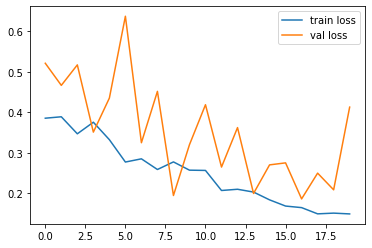

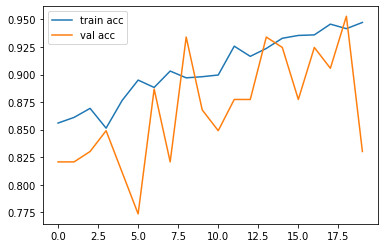

<Figure size 432x288 with 0 Axes>

In [51]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')